In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ClientsData.csv')
df.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15223 non-null  int64  
 1   SOCSTATUS_WORK_FL  15223 non-null  int64  
 2   SOCSTATUS_PENS_FL  15223 non-null  int64  
 3   GENDER             15223 non-null  int64  
 4   CHILD_TOTAL        15223 non-null  int64  
 5   DEPENDANTS         15223 non-null  int64  
 6   PERSONAL_INCOME    15223 non-null  float64
 7   LOAN_NUM_TOTAL     15223 non-null  int64  
 8   LOAN_NUM_CLOSED    15223 non-null  int64  
 9   LOAN_DLQ_NUM       15223 non-null  int64  
 10  TARGET             15223 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.3 MB


Данные по взаимодействия банка с клиентами содержат информаю по 11 характеристикам, всего 15223 записей. Пропусков в данных нет.
6 характеристик (включая target): имеют числовое целочисленное значение, тип int64, что говорит о том, что все эти признаки категориальные. 
4 признака: Age, Child Total, Loan Num Total, Loan Nim Closed - числовые признаки, имеющие конечное значение.
1 признака -Personal Income - имеет непрерывное числовое значение float64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,15223.0,40.406096,11.601068,21.0,30.0,39.0,50.0,67.0
SOCSTATUS_WORK_FL,15223.0,0.909610,0.286748,0.0,1.0,1.0,1.0,1.0
SOCSTATUS_PENS_FL,15223.0,0.134468,0.341165,0.0,0.0,0.0,0.0,1.0
GENDER,15223.0,0.654536,0.475535,0.0,0.0,1.0,1.0,1.0
CHILD_TOTAL,15223.0,1.099389,0.995411,0.0,0.0,1.0,2.0,10.0
DEPENDANTS,15223.0,0.645208,0.812252,0.0,0.0,0.0,1.0,7.0
PERSONAL_INCOME,15223.0,13853.836323,9015.467617,24.0,8000.0,12000.0,17000.0,250000.0
LOAN_NUM_TOTAL,15223.0,1.387769,0.793566,1.0,1.0,1.0,2.0,11.0
LOAN_NUM_CLOSED,15223.0,0.751889,0.988499,0.0,0.0,0.0,1.0,11.0
LOAN_DLQ_NUM,15223.0,0.195362,0.685022,0.0,0.0,0.0,0.0,13.0


Есть 3 бинарных категориальных признака: 
- SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- GENDER — пол клиента (1 — мужчина, 0 — женщина)


<Axes: ylabel='Target'>

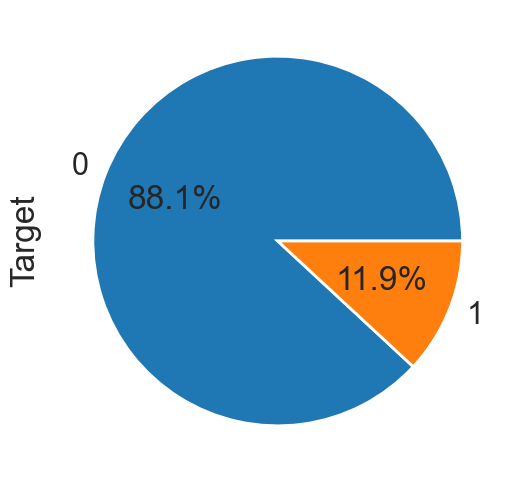

In [16]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('TARGET').size().plot(kind='pie',
                                       y = "target",
                                       label = "Target",
                                       autopct='%1.1f%%')

Таким образом, видим, что классы рапределены очень не равномерно, а именно 9 к 1. 

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Разобьем выборку на тренировочну и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.fit_transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
lg.fit(X_train_scale, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = lg.predict(X_train_scale)
print('accuracy', accuracy_score(y_train, y_pred))
print('precision', precision_score(y_train, y_pred, average='binary'))
print('recall', recall_score(y_train, y_pred, average='binary'))
print('f1', f1_score(y_train, y_pred, average='binary'))

accuracy 0.5861389390704549
precision 0.16993943842906956
recall 0.6417186417186417
f1 0.2687173534532792


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_test = lg.predict(X_test_scale)
print('accuracy', accuracy_score(y_test, y_pred_test))
print('precision', precision_score(y_test, y_pred_test, average='binary'))
print('recall', recall_score(y_test, y_pred_test, average='binary'))
print('f1', f1_score(y_test, y_pred_test, average='binary'))

accuracy 0.5894909688013136
precision 0.17442719881744273
recall 0.6395663956639567
f1 0.27409988385598144


In [57]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
y_pred = neigh.predict(X_train)
print('precision', precision_score(y_train, y_pred, average='binary'))
print('recall', recall_score(y_train, y_pred, average='binary'))
print('f1', f1_score(y_train, y_pred, average='binary'))

precision 0.7048192771084337
recall 0.24324324324324326
f1 0.3616692426584235


In [58]:
y_pred_test = neigh.predict(X_test)
print('accuracy', accuracy_score(y_test, y_pred_test))
print('precision', precision_score(y_test, y_pred_test, average='binary'))
print('recall', recall_score(y_test, y_pred_test, average='binary'))
print('f1', f1_score(y_test, y_pred_test, average='binary'))

accuracy 0.8962233169129721
precision 0.6827586206896552
recall 0.2682926829268293
f1 0.3852140077821012


Качество логистической регрессии для классификации на этих данных достаточно низкая, KNN показывает результаты выше, но все равно качетсво классификации остается низкое, необходимо использовать другие модели для классификации, например, деревья решений методы.

In [59]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree.fit(X, y)
y_pred = tree.predict(X_train)
print('precision', precision_score(y_train, y_pred, average='binary'))
print('recall', recall_score(y_train, y_pred, average='binary'))
print('f1', f1_score(y_train, y_pred, average='binary'))

precision 0.9792899408284024
recall 0.6881496881496881
f1 0.8083028083028083


In [60]:
y_pred_test = tree.predict(X_test)
print('accuracy', accuracy_score(y_test, y_pred_test))
print('precision', precision_score(y_test, y_pred_test, average='binary'))
print('recall', recall_score(y_test, y_pred_test, average='binary'))
print('f1', f1_score(y_test, y_pred_test, average='binary'))

accuracy 0.9625615763546798
precision 0.9885057471264368
recall 0.6991869918699187
f1 0.819047619047619


Не смотря на то, что мы проходили Логистическую регрессию, логистическая регрессия для бинарной классификации клиентов банка по лояльности не показала хорооший результатов:
- f2 мера на тренировочной выборке = 0.27
- f2 мера на тестовой выборке = 0.27

Применение метода KNN показало результаты лучше, но все-равно достаочно низкие:
- f2 мера на тренировочной выборке = 0.36
- f2 мера на тестовой выборке = 0.39

Применение дерева решений уже показало значительно более точные результаты:
- f2 мера на тренировочной выборке = 0.81
- f2 мера на тестовой выборке = 0.82

Для дальнейшего улучшения качества модели классификации клиентов банка могут быть использованы уже более сложные модели, например, ансамблевые модели.
